In [7]:
from hybrids_pv import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import pyswarms as ps
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher

# %matplotlib inline

In [8]:
ghi, temp = read_environmental_data(r'C:\GitHub\OnSSET\Results\sl-2-pv.csv')
hours = np.arange(8760)
start_year = 2020
end_year = 2030

### Technology costs

In [9]:
diesel_cost=897  # diesel generator capital cost, USD/kW rated power
discount_rate=0.08
n_chg=0.92  # charge efficiency of battery
n_dis=0.92  # discharge efficiency of battery
battery_cost=139  # battery capital capital cost, USD/kWh of storage capacity
pv_cost=990  # PV panel capital cost, USD/kW peak power
pv_life=25  # PV panel expected lifetime, years
diesel_life=10  # diesel generator expected lifetime, years
pv_om=0.015  # annual OM cost of PV panels
diesel_om=0.1  # annual OM cost of diesel generator
inverter_cost=649
inverter_life=10
dod_max = 0.8  # maximum depth of discharge of battery
inv_eff=0.92  # inverter_efficiency
charge_controller=142

lpsp_max=0.05  # maximum loss of load allowed over the year, in share of kWh
diesel_limit = 0.5

### Settlement information 

In [10]:
settlement = {'ghi': 2300,  # Annual solar resource (kWh/m2)
              'diesel_price': 0.9,  # Diesel fuel price (USD/l) including transport cost
              'tier': 5,  # Demand Tier of the MTF
              'energy_demand': 100000}  # Annual electricity demand (kWh/year)

settlement_2 = {'ghi': 1700,  # Annual solar resource (kWh/m2)
              'diesel_price': 0.7,  # Diesel fuel price (USD/l) including transport cost
              'tier': 3,  # Demand Tier of the MTF
              'energy_demand': 50000}  # Annual electricity demand (kWh/year)

settlement_3 = {'ghi': 2000,  # Annual solar resource (kWh/m2)
              'diesel_price': 1.1,  # Diesel fuel price (USD/l) including transport cost
              'tier': 2,  # Demand Tier of the MTF
              'energy_demand': 7000}  # Annual electricity demand (kWh/year)

# Comparison of configurations

In [11]:
pv_sizes = 20
diesel_sizes = 20
battery_sizes = [0.25, 0.5] #, 2, 3]

In [12]:
outputs = pv_diesel_hybrid(settlement['energy_demand'], settlement['ghi'], ghi, temp, settlement['tier'], start_year, end_year, 
                            settlement['diesel_price'], pv_no=pv_sizes, diesel_no=diesel_sizes, battery_sizes=battery_sizes, array_output=True)

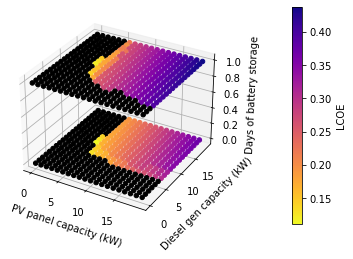

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
data = outputs[-4]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

z, x, y = data.nonzero()
p = ax.scatter(x, y, z, c=data, alpha=1, cmap='plasma_r')

ax.set_xlabel('PV panel capacity (kW)')
ax.set_ylabel('Diesel gen capacity (kW)')
ax.set_zlabel('Days of battery storage')

#xticks = outputs[-3]
#xlabels = list(np.around(np.array(xticks)))
#ax.set_xticklabels(xlabels)

yticks = outputs[-2]

zticks = outputs[-1]
#zlabels = list(np.around(np.array(zticks)))
#ax.set_zticklabels(zlabels)

fig.colorbar(p, pad=0.2, label='LCOE')
plt.show()


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
data = outputs[-1]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

z, x, y = data.nonzero()
p = ax.scatter(x, y, z, c=data, alpha=1, cmap='plasma_r')

ax.set_xlabel('PV panel capacity (kW)')
ax.set_ylabel('Diesel gen capacity (kW)')
ax.set_zlabel('Days of battery storage')

#xticks = outputs[-3]
#xlabels = list(np.around(np.array(xticks)))
#ax.set_xticklabels(xlabels)

yticks = outputs[-2]

zticks = outputs[-1]
#zlabels = list(np.around(np.array(zticks)))
#ax.set_zticklabels(zlabels)

fig.colorbar(p, pad=0.2, label='LPSP')
plt.show()


In [17]:
time.time()

1647522034.3814082

#  Current "brute-force" simulation approach

### Search space parameters

In [18]:
# battery_sizes = np.linspace(0.1, 3, steps).tolist()
diesel_and_pv_steps = [5, 10, 15, 20, 30, 40, 50, 75, 100] #, 200] # , 300, 400, 500] #, 750, 1000]

In [19]:
system_configurations = []
system_configurations_log = []
LCOE = []
Investment = []
PV_Capacity = []
Diesel_Capacity = []
Battery_capacity = []
Renewable_share = []
brute_force_simulation_time = []

system_configurations_2 = []
system_configurations_log_2 = []
LCOE_2 = []
Investment_2 = []
PV_Capacity_2 = []
Diesel_Capacity_2 = []
Battery_capacity_2 = []
Renewable_share_2 = []

system_configurations_3 = []
system_configurations_log_3 = []
LCOE_3 = []
Investment_3 = []
PV_Capacity_3 = []
Diesel_Capacity_3 = []
Battery_capacity_3 = []
Renewable_share_3 = []



for i in diesel_and_pv_steps:
    j = round(i / 10) + 1
    t1 = time.time()
    battery_sizes = np.linspace(0.25, 3, j).tolist()

    lcoe = pv_diesel_hybrid(settlement['energy_demand'], settlement['ghi'], ghi, temp, settlement['tier'], start_year, end_year, 
                            settlement['diesel_price'], pv_no=i, diesel_no=i, battery_sizes=battery_sizes)
    t2 = time.time()
    
    lcoe_2 = pv_diesel_hybrid(settlement_2['energy_demand'], settlement_2['ghi'], ghi, temp, settlement_2['tier'], start_year, end_year, 
                            settlement_2['diesel_price'], pv_no=i, diesel_no=i, battery_sizes=battery_sizes)
        
    lcoe_3 = pv_diesel_hybrid(settlement_3['energy_demand'], settlement_3['ghi'], ghi, temp, settlement_3['tier'], start_year, end_year, 
                            settlement_3['diesel_price'], pv_no=i, diesel_no=i, battery_sizes=battery_sizes)

    system_configurations.append(lcoe[6])
    LCOE.append(lcoe[0])
    Investment.append(lcoe[1])
    PV_Capacity.append(lcoe[2])
    Diesel_Capacity.append(lcoe[3])
    Battery_capacity.append(lcoe[4])
    Renewable_share.append(lcoe[5])
    brute_force_simulation_time.append(t2-t1)
    
    system_configurations_2.append(lcoe_2[6])
    LCOE_2.append(lcoe_2[0])
    Investment_2.append(lcoe_2[1])
    PV_Capacity_2.append(lcoe_2[2])
    Diesel_Capacity_2.append(lcoe_2[3])
    Battery_capacity_2.append(lcoe_2[4])
    Renewable_share_2.append(lcoe_2[5])
    
    system_configurations_3.append(lcoe_3[6])
    LCOE_3.append(lcoe_3[0])
    Investment_3.append(lcoe_3[1])
    PV_Capacity_3.append(lcoe_3[2])
    Diesel_Capacity_3.append(lcoe_3[3])
    Battery_capacity_3.append(lcoe_3[4])
    Renewable_share_3.append(lcoe_3[5])

Text(0.5, 0, 'Number of configurations simulated')

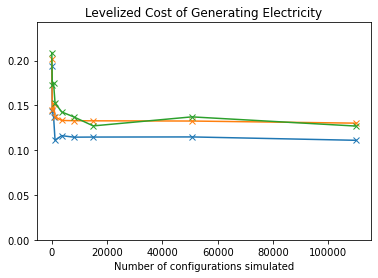

In [20]:
plt.plot(system_configurations, LCOE, marker='x')
plt.plot(system_configurations, LCOE_2, marker='x')
plt.plot(system_configurations, LCOE_3, marker='x')

plt.title('Levelized Cost of Generating Electricity')
plt.ylim([0, max(LCOE)*1.25])
plt.xlabel('Number of configurations simulated')

Text(0.5, 0, 'Number of configurations simulated')

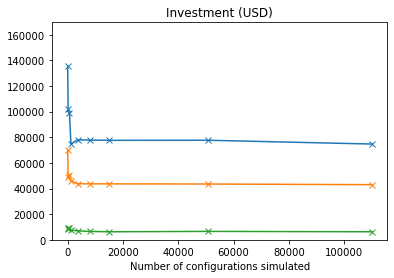

In [21]:
plt.plot(system_configurations, Investment, marker='x')
plt.plot(system_configurations, Investment_2, marker='x')
plt.plot(system_configurations, Investment_3, marker='x')

plt.title('Investment (USD)')
plt.ylim([0, max(Investment)*1.25])
plt.xlabel('Number of configurations simulated')

Text(0.5, 0, 'Number of configurations simulated')

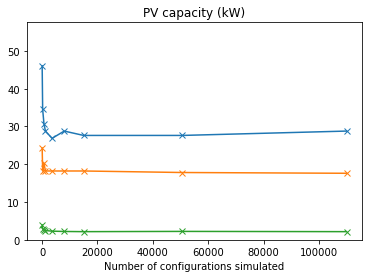

In [22]:
plt.plot(system_configurations, PV_Capacity, marker='x')
plt.plot(system_configurations, PV_Capacity_2, marker='x')
plt.plot(system_configurations, PV_Capacity_3, marker='x')

plt.title('PV capacity (kW)')
plt.ylim([0, max(PV_Capacity)*1.25])
plt.xlabel('Number of configurations simulated')

Text(0.5, 0, 'Number of configurations simulated')

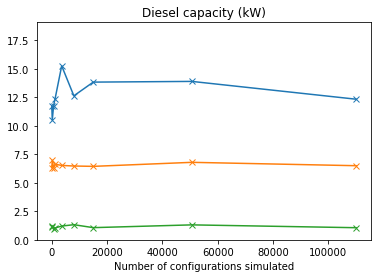

In [23]:
plt.plot(system_configurations, Diesel_Capacity, marker='x')
plt.plot(system_configurations, Diesel_Capacity_2, marker='x')
plt.plot(system_configurations, Diesel_Capacity_3, marker='x')

plt.title('Diesel capacity (kW)')
plt.ylim([0, max(Diesel_Capacity)*1.25])
plt.xlabel('Number of configurations simulated')

Text(0.5, 0, 'Number of configurations simulated')

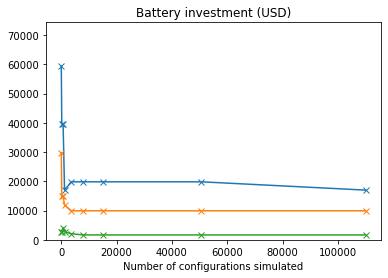

In [24]:
plt.plot(system_configurations, Battery_capacity, marker='x')
plt.plot(system_configurations, Battery_capacity_2, marker='x')
plt.plot(system_configurations, Battery_capacity_3, marker='x')

plt.title('Battery investment (USD)')
plt.ylim([0, max(Battery_capacity)*1.25])
plt.xlabel('Number of configurations simulated')

In [28]:
for s,t in zip(system_configurations, brute_force_simulation_time):
    print('{}  simulations ran in {} seconds'.format(s, round(t,1)))

25  simulations ran in 0.0 seconds
200  simulations ran in 0.1 seconds
675  simulations ran in 0.2 seconds
1200  simulations ran in 0.4 seconds
3600  simulations ran in 1.1 seconds
8000  simulations ran in 2.5 seconds
15000  simulations ran in 4.1 seconds
50625  simulations ran in 17.9 seconds
110000  simulations ran in 47.9 seconds


# Alternative approach using Particle Swarm Optimization (PSO)

Using the open source PySwarms package (https://pyswarms.readthedocs.io/en/latest/intro.html)

In [ ]:
ghi_local_1 = ghi * settlement['ghi'] * 1000 / ghi.sum()
ghi_local_2 = ghi * settlement_2['ghi'] * 1000 / ghi.sum()
ghi_local_3 = ghi * settlement_3['ghi'] * 1000 / ghi.sum()

hour_numbers = np.empty(8760)
for i in prange(365):
    for j in prange(24):
        hour_numbers[i * 24 + j] = j

load_curve_1 = calc_load_curve(settlement['tier'], settlement['energy_demand'])
load_curve_2 = calc_load_curve(settlement_2['tier'], settlement_2['energy_demand'])
load_curve_3 = calc_load_curve(settlement_3['tier'], settlement_3['energy_demand'])

In [ ]:
pv_min = 0
battery_min_1 = 0.25 * (settlement['energy_demand'] / 365)
battery_min_2 = 0.25 * (settlement_2['energy_demand'] / 365)
battery_min_3 = 0.25 * (settlement_3['energy_demand'] / 365)
diesel_min = 0.5
min_bounds_1 = np.array([pv_min, battery_min_1, diesel_min])
min_bounds_2 = np.array([pv_min, battery_min_2, diesel_min])
min_bounds_3 = np.array([pv_min, battery_min_3, diesel_min])

pv_max_1 = 5 * load_curve_1[19]
pv_max_2 = 5 * load_curve_2[19]
pv_max_3 = 5 * load_curve_3[19]
battery_max_1 = 5 * (settlement['energy_demand'] / 365)
battery_max_2 = 5 * (settlement_2['energy_demand'] / 365)
battery_max_3 = 5 * (settlement_3['energy_demand'] / 365)
diesel_max_1 = max(load_curve_1)
diesel_max_2 = max(load_curve_2)
diesel_max_3 = max(load_curve_3)
max_bounds_1 = np.array([pv_max_1, battery_max_1, diesel_max_1])
max_bounds_2 = np.array([pv_max_2, battery_max_2, diesel_max_2])
max_bounds_3 = np.array([pv_max_3, battery_max_3, diesel_max_3])

bounds_1 = (min_bounds_1, max_bounds_1)
bounds_2 = (min_bounds_2, max_bounds_2)
bounds_3 = (min_bounds_3, max_bounds_3)

In [ ]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
optimizer_1 = ps.single.GlobalBestPSO(n_particles=100, dimensions=3, options=options, bounds=bounds_1)
optimizer_2 = ps.single.GlobalBestPSO(n_particles=100, dimensions=3, options=options, bounds=bounds_2)
optimizer_3 = ps.single.GlobalBestPSO(n_particles=100, dimensions=3, options=options, bounds=bounds_3)

In [ ]:
def opt_func_1(X):
    n_particles = X.shape[0]
    lcoe = [find_least_cost_option(X[i], temp, ghi_local_1, hour_numbers,
                              load_curve_1, inv_eff, n_dis, n_chg, dod_max, settlement['energy_demand'], settlement['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit) for i in range (n_particles)]
    return np.array(lcoe)

def opt_func_2(X):
    n_particles = X.shape[0]
    lcoe = [find_least_cost_option(X[i], temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit) for i in range (n_particles)]
    return np.array(lcoe)

def opt_func_3(X):
    n_particles = X.shape[0]
    lcoe = [find_least_cost_option(X[i], temp, ghi_local_3, hour_numbers,
                              load_curve_3, inv_eff, n_dis, n_chg, dod_max, settlement_3['energy_demand'], settlement_3['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit) for i in range (n_particles)]
    return np.array(lcoe)

In [ ]:
cost_1, pos_1 = optimizer_1.optimize(opt_func_1, iters=1000)
cost_2, pos_2 = optimizer_2.optimize(opt_func_2, iters=1000)
cost_3, pos_3 = optimizer_3.optimize(opt_func_3, iters=1000)

In [ ]:
swarm_out_1 = find_least_cost_option(pos_1, temp, ghi_local_1, hour_numbers,
                              load_curve_1, inv_eff, n_dis, n_chg, dod_max, settlement['energy_demand'], settlement['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)

swarm_out_2 = find_least_cost_option(pos_2, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)

swarm_out_3 = find_least_cost_option(pos_3, temp, ghi_local_3, hour_numbers,
                              load_curve_3, inv_eff, n_dis, n_chg, dod_max, settlement_3['energy_demand'], settlement_3['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)

In [ ]:
print('Settlement 1')
print('Brute force approach')
print('LCOE: ' + str(round(LCOE[-1],3)))
print('PV Capacity (kW): ' + str(round(PV_Capacity[-1],1)))
print('Diesel Capacity (kW): ' + str(round(Diesel_Capacity[-1],1)))
print('Battery capacity (kWh): ' + str(round(Battery_capacity[-1], 1)))
print('')
print('Particle Swarm Optimization')
print('LCOE: ' + str(round(cost_1,3)))
print('PV Capacity (kW): ' + str(round(pos_1[0],1)))
print('Diesel Capacity (kW): ' + str(round(pos_1[2],1)))
print('Battery capacity (kWh): ' + str(round(swarm_out_1[-1], 1)))
print('')
print('Settlement 2')
print('Brute force approach')
print('LCOE: ' + str(round(LCOE_2[-1],3)))
print('PV Capacity (kW): ' + str(round(PV_Capacity_2[-1],1)))
print('Diesel Capacity (kW): ' + str(round(Diesel_Capacity_2[-1],1)))
print('Battery capacity (kWh): ' + str(round(Battery_capacity_2[-1], 1)))
print('')
print('Particle Swarm Optimization')
print('LCOE: ' + str(round(cost_2,3)))
print('PV Capacity (kW): ' + str(round(pos_2[0],1)))
print('Diesel Capacity (kW): ' + str(round(pos_2[2],1)))
print('Battery capacity (kWh): ' + str(round(swarm_out_2[-1], 1)))
print('')
print('Settlement 3')
print('Brute force approach')
print('LCOE: ' + str(round(LCOE_3[-1],3)))
print('PV Capacity (kW): ' + str(round(PV_Capacity_3[-1],1)))
print('Diesel Capacity (kW): ' + str(round(Diesel_Capacity_3[-1],1)))
print('Battery capacity (kWh): ' + str(round(Battery_capacity_3[-1], 1)))
print('')
print('Particle Swarm Optimization')
print('LCOE: ' + str(round(cost_3,3)))
print('PV Capacity (kW): ' + str(round(pos_3[0],1)))
print('Diesel Capacity (kW): ' + str(round(pos_3[2],1)))
print('Battery capacity (kWh): ' + str(round(swarm_out_3[-1], 1)))